In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Con datos de ejemplo generados con make_classification

In [2]:
# Generar datos de ejemplo
X, y = make_classification(random_state=0)

In [3]:
X

array([[-0.03926799,  0.13191176, -0.21120598, ...,  1.97698901,
         1.02122474, -0.46931074],
       [ 0.77416061,  0.10490717, -0.33281176, ...,  1.2678044 ,
         0.62251914, -1.49026539],
       [-0.0148577 ,  0.67057045, -0.21416666, ..., -0.10486202,
        -0.10169727, -0.45130304],
       ...,
       [ 0.29673317, -0.49610233, -0.86404499, ..., -1.10453952,
         2.01406015,  0.69042902],
       [ 0.08617684,  0.9836362 ,  0.17124355, ...,  2.11564734,
         0.11273794,  1.20985013],
       [-1.58249448, -1.42279491, -0.56430103, ...,  1.26661394,
        -1.31771734,  1.61805427]])

In [4]:
X.shape

(100, 20)

In [5]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [6]:
y.shape

(100,)

In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
# Crear un clasificador de bosque aleatorio con 100 árboles
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [9]:
# Entrenar el clasificador en los datos de entrenamiento
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [10]:
# Evaluar el rendimiento del clasificador en los datos de prueba
score = clf.score(X_test, y_test)

In [11]:
print(f"El rendimiento del clasificador es {score:.2f}")

El rendimiento del clasificador es 0.92


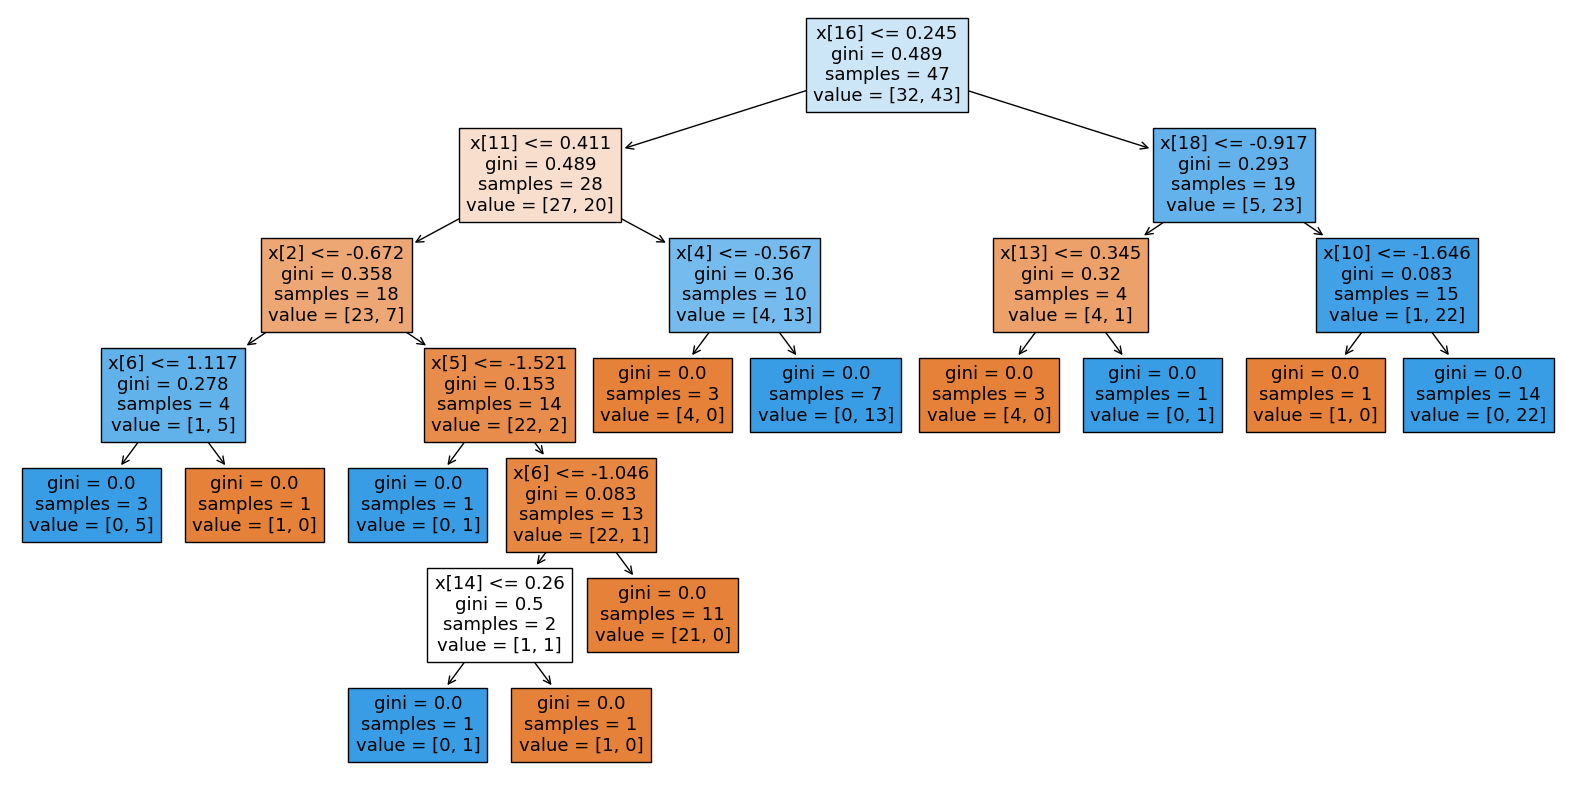

In [12]:
# Visualizar el primer árbol de decisión en el bosque aleatorio
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)
plt.show()

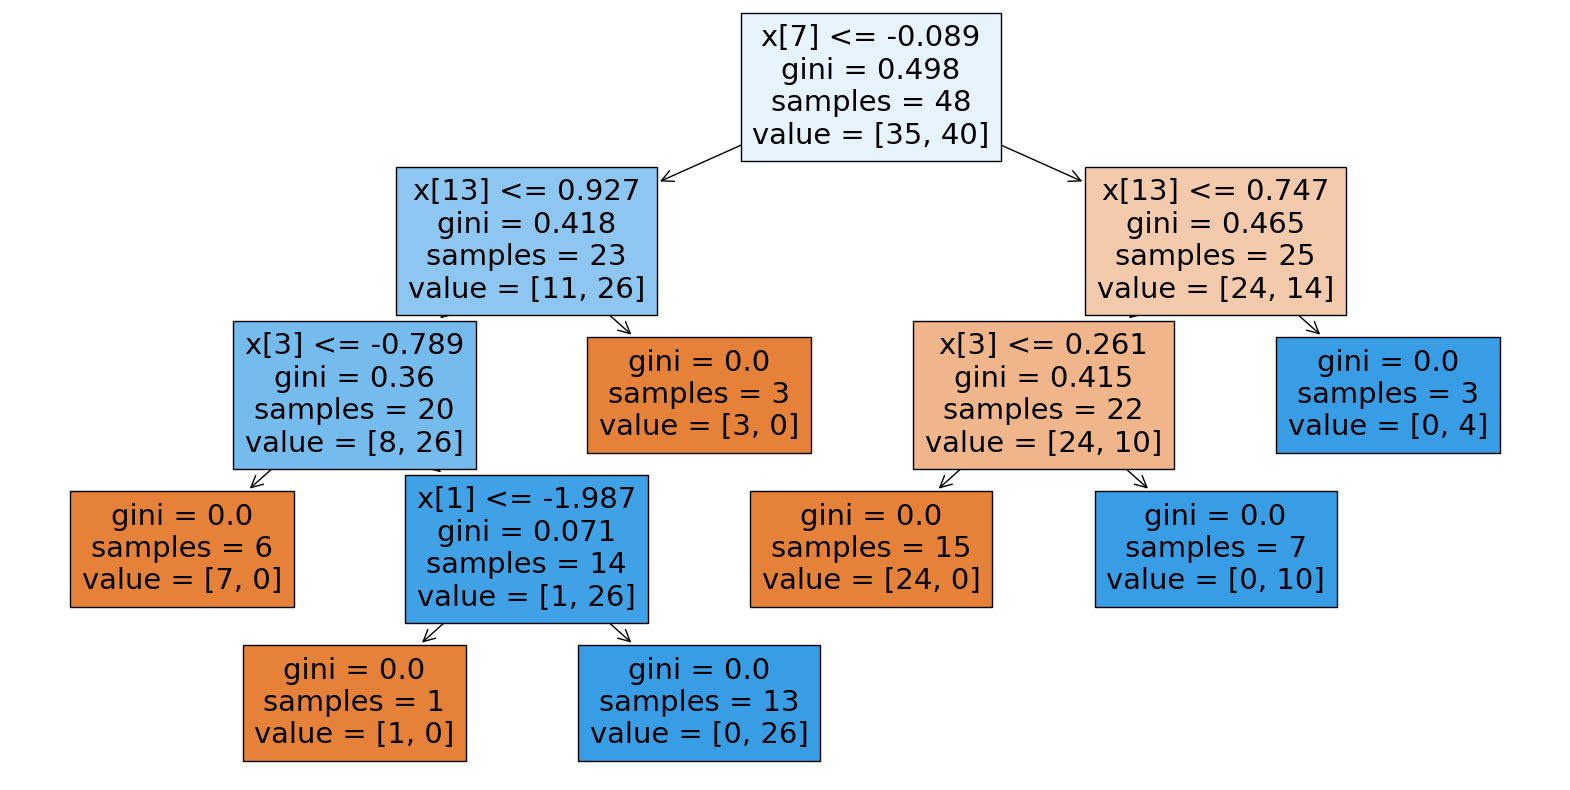

In [13]:
# Visualizar el segundo árbol de decisión en el bosque aleatorio
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[1], filled=True)
plt.show()

In [14]:
y_prediccion = clf.predict(X_test)

In [15]:
y_prediccion

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0])

In [16]:
y_test

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0])

# Con datos de iris

In [17]:
# Cargar el conjunto de datos Iris
iris = load_iris()

In [18]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [19]:
# Crear un clasificador de bosque aleatorio con 100 árboles
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [20]:
# Entrenar el clasificador en los datos de entrenamiento
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [21]:
# Evaluar el rendimiento del clasificador en los datos de prueba
score = clf.score(X_test, y_test)

In [22]:
print(f"El rendimiento del clasificador es {score:.2f}")

El rendimiento del clasificador es 0.97


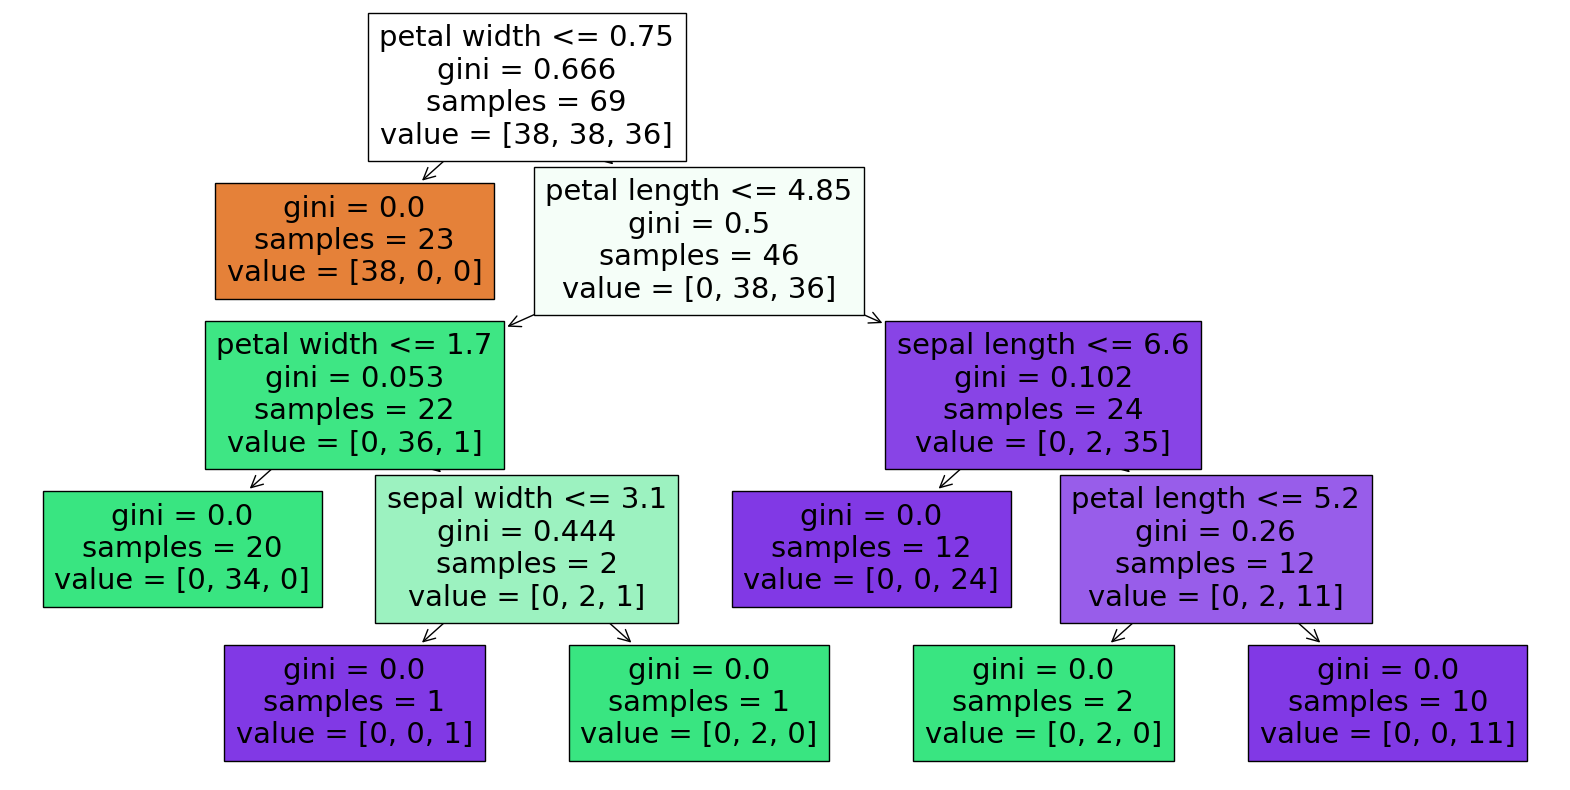

In [23]:
# Visualizar el primer árbol de decisión en el bosque aleatorio
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True, feature_names=["sepal length","sepal width", "petal length","petal width"])
plt.show()

# Validación cruzada con los datos de iris

In [24]:
# Crear un clasificador de bosque aleatorio con 100 árboles
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [25]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [26]:
# Aplicar la validación cruzada en el clasificador
scores = cross_val_score(clf, iris.data, iris.target, cv=5)

In [27]:
# Mostrar los puntajes de validación cruzada
print(f"Los puntajes de validación cruzada son: {scores}")

Los puntajes de validación cruzada son: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


# Curva ROC

In [28]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [29]:
# Crear un clasificador de bosque aleatorio con 100 árboles
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [30]:
# Entrenar el clasificador en los datos de entrenamiento
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
#Predicciones
y_pred = clf.predict(X_test)
y_pred = y_pred.flatten()
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [32]:
y_test = y_test.flatten()
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])